In [13]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data
from NNS import NeuralNetwork as NN #import neural net code from github to reduce copy/pasting

# Chapter 11

### Testing with Out-of-Sample Data

In [10]:
X_test, y_test = spiral_data( samples = 100 , classes = 3 )

dense1 = NN.Layer_Dense(2,64)
activation1 = NN.Activation_ReLU()
dense2 = NN.Layer_Dense(64,3)
loss_activation = NN.Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = NN.Optimizer_Adam(learning_rate=0.05, decay = 5e-7)


for epoch in range(10001):
    
    dense1.forward(X_test)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y_test)
    
    predictions = np.argmax(loss_activation.output, axis = 1 )
    if len (y_test.shape) == 2 :
        y_test = np.argmax(y_test, axis = 1 )
    accuracy = np.mean(predictions == y_test)
    
    #Print every 100th epoch
    if not epoch % 100 :
        print ( f'validation, acc: {accuracy :.3f} , loss: {loss :.3f} ' )
        
    # Backward pass
    loss_activation.backward(loss_activation.output, y_test)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()
    
    
y_pred = np.argmax(loss_activation.output, axis = 1 )


validation, acc: 0.323 , loss: 1.099 
validation, acc: 0.753 , loss: 0.682 
validation, acc: 0.823 , loss: 0.528 
validation, acc: 0.770 , loss: 0.506 
validation, acc: 0.823 , loss: 0.449 
validation, acc: 0.847 , loss: 0.392 
validation, acc: 0.853 , loss: 0.351 
validation, acc: 0.873 , loss: 0.325 
validation, acc: 0.867 , loss: 0.316 
validation, acc: 0.877 , loss: 0.298 
validation, acc: 0.880 , loss: 0.292 
validation, acc: 0.897 , loss: 0.279 
validation, acc: 0.900 , loss: 0.272 
validation, acc: 0.887 , loss: 0.268 
validation, acc: 0.867 , loss: 0.290 
validation, acc: 0.873 , loss: 0.260 
validation, acc: 0.877 , loss: 0.257 
validation, acc: 0.910 , loss: 0.247 
validation, acc: 0.900 , loss: 0.254 
validation, acc: 0.890 , loss: 0.240 
validation, acc: 0.887 , loss: 0.237 
validation, acc: 0.903 , loss: 0.243 
validation, acc: 0.890 , loss: 0.235 
validation, acc: 0.907 , loss: 0.234 
validation, acc: 0.900 , loss: 0.228 
validation, acc: 0.903 , loss: 0.226 
validation, 

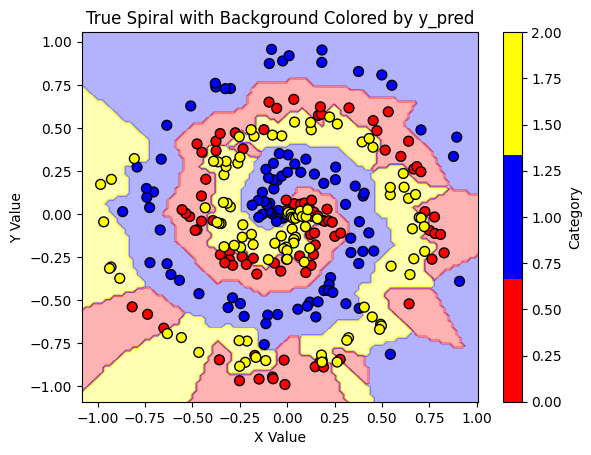

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#  Create a meshgrid for the plot background
x_min, x_max = X_test[:, 0].min() -0.1 , X_test[:, 0].max() +0.1
y_min, y_max = X_test[:, 1].min() -0.1, X_test[:, 1].max() +0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Step 2: Predict the category for each point in the meshgrid based off of y_pred
# Using the nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_test, y_pred)

# Predict categories for the meshgrid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions back to the grid shape
Z = Z.reshape(xx.shape)

# Create the background color plot
cmap = ListedColormap(['red', 'blue', 'yellow'])  # Assign colors for each category
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)  # Fill the regions with color

# Plot the scatter plot, 
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, edgecolors='k', s=50)

# Add color bar to indicate values of y_pred
plt.colorbar(label='Category')

# Add labels and title
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('True Spiral with Background Colored by y_pred')

# Show the plot
plt.show()


We see that the model is overfitting